<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #6: Word2Vec
`Fecha de entrega: Septiembre 19, 2020. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`



Datos: Libre elección

Expectativas:
- Pre-procesamiento del texto
- Uso de Word2Vec (Consejo: jugar con los parámetros)
- Mostrar las palabras más parecidas (`most_similar`) de tres palabras que le llamen la atención
- Responder:
    - ¿Su modelo da buenos resultados? ¿Por qué sí o por qué no?
    - ¿Qué problemas encontró al realizar este taller?


Bonus: 
- Usar una función que no hayamos visto en clase ([Aquí](https://radimrehurek.com/gensim/models/word2vec.html#module-gensim.models.word2vec))
- Visualizar el modelo usando PCA

In [1]:
import re
import sys
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')
import gensim.models.word2vec as w2v

# Leer Archivo


In [2]:
texto = pd.read_csv("C:/Users/practicas/Downloads/dialogos.csv")
texto

,Locución
0,Francamente no
1,"Lo del canadiense. Por favor, como que vosotro..."
2,Tienes razón. A lo mejor así te liberas de tu ...
3,"Pues, tú sabrás"
4,Para mí que fue Krieger
...,...
954,"Yo qué sé, digo yo qué será"
955,Lo han entendido mal. Las joyas que venden en ...
956,Oooo... Me llamo Vivian
957,¿De dónde? ¿Del coño de tu madre?


# Procesamiento Texto 

In [3]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto.split()

texto['procesado'] = texto['Locución'].apply(lambda texto: pre_procesado(texto))
texto.head()

,Locución,procesado
0,Francamente no,[francamente]
1,"Lo del canadiense. Por favor, como que vosotro...","[canadiense, favor, tiraríais, allí, si, pudie..."
2,Tienes razón. A lo mejor así te liberas de tu ...,"[razón, mejor, así, liberas, energía, nagativa]"
3,"Pues, tú sabrás","[pues, sabrás]"
4,Para mí que fue Krieger,[krieger]


# Modelo

In [4]:
%%time
modelo = w2v.Word2Vec(texto['procesado'].values,
                         sg=1,        # Skip_gram o Bolsa palabras
                         seed=9,      # Semilla
                         size=50,     # Numero dimensiones 
                         min_count=4, # Numero de minimo que aparece cada palabra
                         window=12)   # ventana


Wall time: 126 ms


In [5]:
modelo.wv.vocab

{'favor': <gensim.models.keyedvectors.Vocab at 0x1cabf651700>,
 'allí': <gensim.models.keyedvectors.Vocab at 0x1cabf6517c0>,
 'si': <gensim.models.keyedvectors.Vocab at 0x1cabf651a00>,
 'mejor': <gensim.models.keyedvectors.Vocab at 0x1cabf651970>,
 'así': <gensim.models.keyedvectors.Vocab at 0x1cabf651bb0>,
 'pues': <gensim.models.keyedvectors.Vocab at 0x1cabf651af0>,
 'krieger': <gensim.models.keyedvectors.Vocab at 0x1cabf651b80>,
 'bebé': <gensim.models.keyedvectors.Vocab at 0x1cabf651be0>,
 'lando': <gensim.models.keyedvectors.Vocab at 0x1cabf651a90>,
 'serio': <gensim.models.keyedvectors.Vocab at 0x1cabf651df0>,
 'randy': <gensim.models.keyedvectors.Vocab at 0x1cabf651dc0>,
 'creo': <gensim.models.keyedvectors.Vocab at 0x1cabf651d00>,
 'deporte': <gensim.models.keyedvectors.Vocab at 0x1cabf651ca0>,
 'daño': <gensim.models.keyedvectors.Vocab at 0x1cabf651c70>,
 'cerebro': <gensim.models.keyedvectors.Vocab at 0x1cabf651e80>,
 'esperad': <gensim.models.keyedvectors.Vocab at 0x1cabf651

In [6]:
modelo.wv.most_similar("cuatorce")

[('faux', 0.6125144362449646),
 ('quilates', 0.6018350124359131),
 ('veces', 0.5764104723930359),
 ('visto', 0.5731015801429749),
 ('juego', 0.5709453821182251),
 ('aretes', 0.5407878160476685),
 ('futbol', 0.5066079497337341),
 ('globo', 0.5032805800437927),
 ('corbata', 0.5014967918395996),
 ('jugadores', 0.4581395387649536)]

In [7]:
modelo.wv.most_similar("mejor")

[('papá', 0.37386929988861084),
 ('stan', 0.35318678617477417),
 ('pues', 0.3354177474975586),
 ('amable', 0.3336073160171509),
 ('toda', 0.3319058120250702),
 ('programa', 0.3281063437461853),
 ('cuesta', 0.3120603859424591),
 ('entrenador', 0.31166791915893555),
 ('tan', 0.30922186374664307),
 ('claro', 0.3073864281177521)]

In [8]:
modelo.wv.most_similar("ley")

[('jugando', 0.3788006901741028),
 ('vas', 0.3514792025089264),
 ('violencia', 0.34980642795562744),
 ('hoy', 0.335712730884552),
 ('negro', 0.30175086855888367),
 ('creo', 0.3015078604221344),
 ('gracias', 0.30117395520210266),
 ('ustedes', 0.29348623752593994),
 ('mientras', 0.29227378964424133),
 ('allí', 0.2877221703529358)]

In [9]:
modelo.wv.most_similar("futbol")

[('juego', 0.582168698310852),
 ('globo', 0.5718696713447571),
 ('visto', 0.5464701652526855),
 ('randy', 0.5181059837341309),
 ('trece', 0.5090720653533936),
 ('cuatorce', 0.5066079497337341),
 ('señor', 0.49678635597229004),
 ('denver', 0.49021780490875244),
 ('faux', 0.4892917275428772),
 ('sé', 0.47350719571113586)]

In [11]:
modelo.wv.most_similar("gracias")

[('creo', 0.45964759588241577),
 ('niños', 0.41369158029556274),
 ('faux', 0.4002017378807068),
 ('oh', 0.38681560754776),
 ('favor', 0.3857085108757019),
 ('hola', 0.37848764657974243),
 ('acerca', 0.37536555528640747),
 ('mientras', 0.36076340079307556),
 ('menos', 0.3484331965446472),
 ('seguridad', 0.3391709327697754)]

In [13]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot


In [14]:

vocab = [e[0] for e in modelo.wv.most_similar("cuatorce")]+[e[0] for e in modelo.wv.most_similar("mejor")]
print(vocab)


['faux', 'quilates', 'veces', 'visto', 'juego', 'aretes', 'futbol', 'globo', 'corbata', 'jugadores', 'papá', 'stan', 'pues', 'amable', 'toda', 'programa', 'cuesta', 'entrenador', 'tan', 'claro']


In [15]:
X = modelo[modelo.wv.vocab]
matrix = pd.DataFrame(X)
matrix.index = modelo.wv.vocab.keys()
matrix


<ipython-input-15-742a09174b35>:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
favor,0.006337,-0.001577,0.002047,-0.002859,-0.001201,0.009571,0.005973,0.005674,0.008432,0.001757,...,-0.007500,-0.000993,0.008265,-0.005015,-0.009085,0.004860,-0.006159,0.008054,0.001837,0.006904
allí,0.004879,0.011667,-0.002090,-0.001280,0.002236,0.003145,0.009522,0.005783,0.012247,-0.005618,...,0.003760,0.002171,-0.002696,-0.007555,-0.005079,0.003870,-0.005018,0.008566,-0.003566,-0.008952
si,0.016943,-0.006138,-0.005483,-0.007141,0.006703,-0.004364,0.000775,0.003193,0.011499,0.002363,...,-0.003947,-0.007350,0.007325,0.006138,-0.008262,0.003294,0.007087,0.012508,0.003137,-0.002007
mejor,0.007994,0.003794,0.001792,-0.000439,0.005266,0.009249,0.009324,-0.007955,-0.003495,-0.002208,...,-0.004012,0.008852,0.005767,0.006051,0.007948,-0.000075,0.007444,-0.000880,0.001865,-0.000460
así,0.011997,0.001160,0.006744,0.007273,-0.009984,-0.005638,-0.004667,-0.000151,-0.002082,0.009063,...,-0.010708,-0.001127,-0.006375,0.008774,-0.004954,0.006588,-0.005148,0.011522,0.008274,0.001044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aretes,0.020226,0.013625,-0.011296,0.001530,-0.000766,0.001469,-0.002348,0.004734,0.018681,0.010457,...,-0.000064,0.009261,-0.001809,0.001871,0.005476,0.020180,-0.008961,0.018738,0.005319,-0.000811
faux,0.011153,0.014396,-0.001299,-0.010696,0.006674,-0.001186,0.004069,0.013262,0.013606,-0.002433,...,-0.007502,-0.006382,-0.001725,-0.001294,-0.007163,0.012058,-0.003592,0.022413,-0.009195,0.011707
cuatorce,0.012622,0.012125,-0.005218,-0.000502,0.000133,0.003353,0.005841,0.001042,0.006223,-0.004003,...,0.003491,0.011745,-0.010948,0.003711,0.003578,0.013580,-0.010122,0.006277,-0.011141,0.004985
capas,-0.006824,-0.005492,0.004787,-0.003534,0.005373,0.009382,0.009729,0.000960,-0.000004,-0.001364,...,-0.007535,-0.002221,0.007218,-0.008160,0.003995,0.000034,-0.005922,-0.006926,0.004940,-0.003514


In [16]:
matrix.shape

(252, 50)

In [17]:
pca = PCA(n_components=2)

result = pca.fit_transform(matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['Palabra'] = matrix.index.values

result

,X,Y,Palabra
0,0.006015,0.009881,favor
1,0.004321,-0.000271,allí
2,0.011373,0.023007,si
3,-0.004112,0.001529,mejor
4,0.001843,-0.007212,así
...,...,...,...
247,0.039873,-0.007396,aretes
248,0.048325,0.016153,faux
249,0.025535,-0.000155,cuatorce
250,-0.010407,0.006522,capas


In [19]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['Palabra'].values,
                   mode='markers') 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# ¿Su modelo da buenos resultados? ¿Por qué sí o por qué no?

_ Considero que mi modelo no arrojo buenos resultados por los datos utilizados. "no existe similitudes entre las palabras" 


# ¿Qué problemas encontró al realizar este taller?

tuve varios inconvenientes para cargar los datos; Al final tuve que cargar datos utilizados en una clase anterior. cuando pude cargar los datos no podia aplicar el Word2Vec, no me permitia cargar las librerias gensim ni plotly.  

#### Por dejar el taller a ultima hora! 

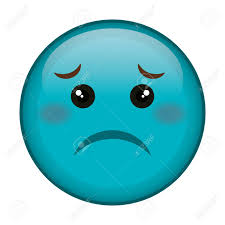


